# LDA ==> Latent Dirichlet Allocation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/semester 5/ppw/CrawlBerita_Politik-Olahraga.csv")
print(df)

                                                 judul  \
0                                      Title Not Found   
1    Mensos Ajak Kepala Daerah Kolaborasi Sukseskan...   
2    Mendagri & CIO Danantara Bahas Penguatan Pendi...   
3    Video: Alasan Tersangka Penculikan Kacab Bank ...   
4    Kemnaker Catat 16.900 Pengunjung PTSA, Mayorit...   
..                                                 ...   
195  Hasil Hong Kong Open 2025: Febriana/Meilysa Ka...   
196  Hasil Hong Kong Open 2025: Apri/Fadia Dikalahk...   
197  Jadwal Hong Kong Open 2025 Hari Ini: 8 Wakil R...   
198  Timnas Wushu Indonesia Bawa Enam Medali dari K...   
199  Indonesia Kirim 2 Atlet Teqball ke Kejuaraan D...   

                                                   isi  kategori  
0                                    Content Not Found   Politik  
1    Jakarta - Menteri Sosial Saifullah Yusuf (Gus ...   Politik  
2    Jakarta - Menteri Dalam Negeri Muhammad Tito K...   Politik  
3    Polisi mengungkap alasan para 

In [3]:
df['index'] = df.index

documents = df
documents.head()

,judul,isi,kategori,index
0,Title Not Found,Content Not Found,Politik,0
1,Mensos Ajak Kepala Daerah Kolaborasi Sukseskan...,Jakarta - Menteri Sosial Saifullah Yusuf (Gus ...,Politik,1
2,Mendagri & CIO Danantara Bahas Penguatan Pendi...,Jakarta - Menteri Dalam Negeri Muhammad Tito K...,Politik,2
3,Video: Alasan Tersangka Penculikan Kacab Bank ...,Polisi mengungkap alasan para tersangka pencul...,Politik,3
4,"Kemnaker Catat 16.900 Pengunjung PTSA, Mayorit...",Jakarta - Kementerian Ketenagakerjaan (Kemnake...,Politik,4


In [4]:
len(documents)

200

# **DATA PREPROCESSING**

In [5]:
!pip install gensim

In [6]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [7]:
# 1. Install Sastrawi
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.8 MB/s eta 0:00:00


In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import gensim
import nltk
nltk.download('stopwords')

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stopwords.words('indonesian') and len(token) > 3:
            result.append(stemmer.stem(token))
    return result


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
processed_docs = documents['isi'].map(preprocess)

print(processed_docs)

0                                       [content, found]
1      [jakarta, menteri, sosial, saifullah, yusuf, i...
2      [jakarta, menteri, negeri, muhammad, tito, kar...
3      [polisi, ungkap, alas, sangka, culi, ujung, ka...
4      [jakarta, menteri, ketenagakerjaan, kemnaker, ...
                             ...                        
195    [jakarta, pasang, ganda, putri, indonesia, feb...
196    [daftar, jadwal, hasil, wakil, indonesia, hong...
197    [hong, kong, delapan, wakil, indonesia, tandin...
198    [jakarta, timnas, wushu, indonesia, tuntas, ja...
199    [jakarta, seri, juara, dunia, teqball, world, ...
Name: isi, Length: 200, dtype: object


# Get a BOW Dict from data

Mendapatkan kamus Bag of word
Untuk membangun model LDA dengan Gensim, kita perlu memasukkan korpus dalam bentuk kamus Bag of word atau kamus tf-idf. Kita memfilter kamus kita untuk menghilangkan pasangan kunci: nilai dengan kurang dari 15 kemunculan atau lebih dari 10% dari total jumlah sampel.

In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
unique_words = list(dictionary.values())
print(unique_words)
print("\n=== Sesudah filter ===")
print("Jumlah kata unik:", len(dictionary))

#dictionary diBuat daftar kata unik dan ID

['content', 'found', 'acu', 'advertisement', 'ajak', 'april', 'arah', 'baca', 'baik', 'bal', 'bale', 'bandung', 'bangun', 'banjir', 'bansos', 'bantu', 'bantur', 'barat', 'bareng', 'baru', 'bawang', 'bentuk', 'bijak', 'bikin', 'bupati', 'calon', 'camat', 'capai', 'catat', 'ciwidey', 'continue', 'dadang', 'daerah', 'dasar', 'data', 'daya', 'desil', 'didik', 'dinas', 'ditindaklanjuti', 'dorong', 'dtsen', 'duduk', 'ekonomi', 'elaborasi', 'endah', 'gedung', 'graduasi', 'gubernur', 'harupat', 'hektare', 'imbuh', 'indonesia', 'intervensi', 'ipul', 'jakarta', 'jalak', 'jaya', 'juta', 'kabupaten', 'kala', 'kasih', 'kawasan', 'kecuali', 'kelola', 'kembang', 'kemensos', 'kepala', 'kerja', 'keroyok', 'kesiap', 'kolaborasi', 'koordinator', 'korban', 'kota', 'kuat', 'lahan', 'lathifah', 'lembaga', 'lintas', 'luas', 'luka', 'mailangkay', 'malang', 'mandat', 'mari', 'masyarakat', 'menteri', 'miskin', 'mohon', 'mudah', 'mumpung', 'mutakhir', 'nada', 'nasional', 'nopriawan', 'optimistis', 'padu', 'pemda


# filter the dict

In [11]:
dictionary.filter_extremes(no_below=5, no_above=0.1, keep_n=4000)
print("=== Sesudah filter ===")
print("Jumlah kata unik:", len(dictionary))

=== Sesudah filter ===
Jumlah kata unik: 887


# Convert document into BOW format by doc2bow

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]    #doc2bow(doc) Ubah dokumen jadi angka (frekuensi kata)
print(bow_corpus)   #bow_corpus (Semua dokumen dalam format numerik (siap untuk TF-IDF / LDA))

[[(0, 1)], [(1, 2), (2, 1), (3, 1), (4, 2), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 1), (15, 3), (16, 6), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 2), (31, 4), (32, 2), (33, 5), (34, 1), (35, 1), (36, 2), (37, 1), (38, 2), (39, 3), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 5), (48, 2), (49, 7), (50, 2), (51, 1), (52, 10), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 2), (59, 2), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1)], [(3, 1), (10, 1), (15, 3), (17, 1), (18, 5), (20, 2), (29, 6), (43, 1), (47, 1), (52, 1), (54, 1), (57, 2), (59, 1), (65, 1), (66, 3), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 2), (84, 1), (85, 1), (86, 4), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 3), (98, 

In [13]:
# --- Membuat corpus BoW (Bag-of-Words) ---
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# --- Menampilkan hasil BoW untuk beberapa dokumen ---
print("=== Contoh representasi BoW ===")
for i in range(3):  # tampilkan 3 dokumen pertama
    print(f"\nDokumen ke-{i+1}:")
    print("BoW format:", bow_corpus[i])

    # Konversi kembali ke bentuk kata biar lebih mudah dibaca
    print("Kata dan frekuensinya:")
    for word_id, freq in bow_corpus[i]:
        print(f"  {dictionary[word_id]} : {freq}")


=== Contoh representasi BoW ===

Dokumen ke-1:
BoW format: [(0, 1)]
Kata dan frekuensinya:
  found : 1

Dokumen ke-2:
BoW format: [(1, 2), (2, 1), (3, 1), (4, 2), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 1), (15, 3), (16, 6), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1), (30, 2), (31, 4), (32, 2), (33, 5), (34, 1), (35, 1), (36, 2), (37, 1), (38, 2), (39, 3), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 5), (48, 2), (49, 7), (50, 2), (51, 1), (52, 10), (53, 1), (54, 2), (55, 2), (56, 1), (57, 1), (58, 2), (59, 2), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1)]
Kata dan frekuensinya:
  ajak : 2
  arah : 1
  bal : 1
  bandung : 2
  bangun : 3
  barat : 1
  bareng : 2
  baru : 1
  bentuk : 1
  bijak : 1
  bikin : 1
  bupati : 4
  calon : 1
  camat : 1
  daerah : 3
  data : 6
  daya : 3
  didik : 1
  dinas : 1
  dorong : 1
  ekonomi : 1
  gedung : 1
  imbuh : 

In [14]:
# --- Tampilkan BoW untuk 3 dokumen pertama ---

num_docs_to_show = 3  # jumlah dokumen yang ingin ditampilkan

for doc_index in range(num_docs_to_show):
    print(f"\n=== Dokumen ke-{doc_index+1} ===")

    bow_doc = bow_corpus[doc_index]  # ambil BoW dokumen ke-i

    # Jika dokumen kosong (tidak ada kata setelah preprocessing)
    if not bow_doc:
        print("⚠️ Tidak ada kata dalam dokumen ini setelah preprocessing.")
        continue

    # Tampilkan daftar kata unik dan frekuensinya
    for word_id, freq in bow_doc:
        print(f'Word {word_id} ("{dictionary[word_id]}") appears {freq} time{"s" if freq > 1 else ""}.')



=== Dokumen ke-1 ===
Word 0 ("found") appears 1 time.

=== Dokumen ke-2 ===
Word 1 ("ajak") appears 2 times.
Word 2 ("arah") appears 1 time.
Word 3 ("bal") appears 1 time.
Word 4 ("bandung") appears 2 times.
Word 5 ("bangun") appears 3 times.
Word 6 ("barat") appears 1 time.
Word 7 ("bareng") appears 2 times.
Word 8 ("baru") appears 1 time.
Word 9 ("bentuk") appears 1 time.
Word 10 ("bijak") appears 1 time.
Word 11 ("bikin") appears 1 time.
Word 12 ("bupati") appears 4 times.
Word 13 ("calon") appears 1 time.
Word 14 ("camat") appears 1 time.
Word 15 ("daerah") appears 3 times.
Word 16 ("data") appears 6 times.
Word 17 ("daya") appears 3 times.
Word 18 ("didik") appears 1 time.
Word 19 ("dinas") appears 1 time.
Word 20 ("dorong") appears 1 time.
Word 21 ("ekonomi") appears 1 time.
Word 22 ("gedung") appears 1 time.
Word 23 ("imbuh") appears 1 time.
Word 24 ("jaya") appears 1 time.
Word 25 ("kabupaten") appears 1 time.
Word 26 ("kasih") appears 3 times.
Word 27 ("kawasan") appears 1 ti


# TF-IDF on our document set

In [15]:
tfidf = gensim.models.TfidfModel(bow_corpus)
print(tfidf)

#TfidfModel<num_docs=200, num_nnz=21021>
#Total non-zero elements, yaitu jumlah pasangan (kata, bobot TF-IDF) yang tidak nol di seluruh corpus.
#Artinya ada 21.021 kata unik yang memiliki bobot TF-IDF > 0 di seluruh dokumen.

TfidfModel<num_docs=200, num_nnz=8255>


In [16]:
# Buat TF-IDF untuk semua dokumen
tfidf_corpus = [tfidf[doc] for doc in bow_corpus]

print(f"Total dokumen yang direpresentasikan: {len(tfidf_corpus)}")

# Menampilkan hasil TF-IDF untuk semua dokumen
for i, doc in enumerate(tfidf_corpus):
    print(f"\n===== Dokumen ke-{i+1} =====")
    for term_id, weight in doc:
        print(f"{dictionary[term_id]:20s} : {weight:.4f}")

print("\nTotal dokumen yang direpresentasikan:", len(tfidf_corpus))


print("\nKeterangan:")
print("- Bobot TF-IDF menunjukkan seberapa penting kata itu dalam dokumen ini.")
print("- Semakin besar nilainya, semakin khas kata tersebut untuk dokumen ini.")

Output streaming akan dipotong hingga 5000 baris terakhir.
jawa                 : 0.0312
banten               : 0.5149
sepeda               : 0.0421
dapat                : 0.0625
hari                 : 0.0342
bas                  : 0.0401
november             : 0.0342

===== Dokumen ke-86 =====
arah                 : 0.0766
bal                  : 0.0392
dinas                : 0.1790
dorong               : 0.0366
ekonomi              : 0.0392
gedung               : 0.0986
bakar                : 0.0587
tindak               : 0.0402
tinggi               : 0.0846
kendara              : 0.0923
personel             : 0.0533
bilang               : 0.0533
keras                : 0.0784
ada                  : 0.0392
nyata                : 0.0374
anggota              : 0.0732
asal                 : 0.0493
cakup                : 0.0476
janji                : 0.0923
politik              : 0.0895
universitas          : 0.0587
demo                 : 0.1115
penting              : 0.0461
resmi         

In [17]:
corpus_tfidf = tfidf[bow_corpus]
print(corpus_tfidf)

In [18]:
# Loop semua dokumen di corpus_tfidf
for i, doc in enumerate(corpus_tfidf):
    print(f"\n===== Dokumen ke-{i+1} =====")
    print(doc)  # tampilkan daftar (term_id, bobot) untuk tiap dokumen

print("\nTotal dokumen yang direpresentasikan:", len(corpus_tfidf))



===== Dokumen ke-1 =====
[(0, 1.0)]

===== Dokumen ke-2 =====
[(1, 0.10432928739113898), (2, 0.04050495526951369), (3, 0.0414664383642916), (4, 0.12410404682451873), (5, 0.11878641084938751), (6, 0.04357185448686844), (7, 0.12410404682451873), (8, 0.05039233498620357), (9, 0.0414664383642916), (10, 0.05039233498620357), (11, 0.0563920978538055), (12, 0.24820809364903745), (13, 0.05414591626818393), (14, 0.05039233498620357), (15, 0.12151486580854108), (16, 0.2614311269212106), (17, 0.12745868352638443), (18, 0.045979007393424455), (19, 0.04732543576884881), (20, 0.038732646560147764), (21, 0.0414664383642916), (22, 0.05216464369556949), (23, 0.038732646560147764), (24, 0.04050495526951369), (25, 0.045979007393424455), (26, 0.14197630730654642), (27, 0.045979007393424455), (28, 0.0563920978538055), (29, 0.045979007393424455), (30, 0.08100991053902738), (31, 0.24820809364903745), (32, 0.09465087153769762), (33, 0.3102601170612968), (34, 0.05039233498620357), (35, 0.039595470283129174), 

In [19]:
# Menampilkan hasil TF-IDF untuk semua dokumen
for i, doc in enumerate(corpus_tfidf):
    print(f"\n===== Dokumen ke-{i+1} =====")
    for term_id, weight in doc:
        print(f"{dictionary[term_id]:20s} : {weight:.4f}")

print("\nTotal dokumen yang direpresentasikan:", len(corpus_tfidf))


Output streaming akan dipotong hingga 5000 baris terakhir.
roda                 : 0.0421
juli                 : 0.0709
provinsi             : 0.1532
oktober              : 0.0592
jawa                 : 0.0312
banten               : 0.5149
sepeda               : 0.0421
dapat                : 0.0625
hari                 : 0.0342
bas                  : 0.0401
november             : 0.0342

===== Dokumen ke-86 =====
arah                 : 0.0766
bal                  : 0.0392
dinas                : 0.1790
dorong               : 0.0366
ekonomi              : 0.0392
gedung               : 0.0986
bakar                : 0.0587
tindak               : 0.0402
tinggi               : 0.0846
kendara              : 0.0923
personel             : 0.0533
bilang               : 0.0533
keras                : 0.0784
ada                  : 0.0392
nyata                : 0.0374
anggota              : 0.0732
asal                 : 0.0493
cakup                : 0.0476
janji                : 0.0923
politik       

# Running LDA using Bag of Words data

In [20]:
lda_model = gensim.models.LdaMulticore(
    bow_corpus,
    num_topics=20,
    id2word=dictionary,
    passes=20,  # <<< cuma 2 pass!
    iterations=150,
    workers=2,
    random_state=42
)
print(lda_model)

LdaMulticore<num_terms=887, num_topics=20, decay=0.5, chunksize=2000>


In [21]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.109*"akun" + 0.047*"media" + 0.037*"golkar" + 0.034*"ketua" + 0.028*"digital" + 0.027*"usul" + 0.021*"fajar" + 0.021*"anggota" + 0.019*"bijak" + 0.019*"kendali"


Topic: 1 
Words: 0.126*"israel" + 0.052*"gaza" + 0.024*"militer" + 0.023*"serang" + 0.021*"palestina" + 0.016*"spanyol" + 0.016*"perdana" + 0.015*"internasional" + 0.014*"negeri" + 0.013*"perang"


Topic: 2 
Words: 0.072*"polda" + 0.041*"masters" + 0.035*"irjen" + 0.029*"agus" + 0.029*"pohon" + 0.029*"kunjung" + 0.027*"tanam" + 0.021*"kapolda" + 0.021*"polri" + 0.018*"bentuk"


Topic: 3 
Words: 0.035*"bulutangkis" + 0.028*"juang" + 0.023*"bayar" + 0.023*"tuntas" + 0.023*"pace" + 0.023*"maybank" + 0.023*"marathon" + 0.023*"future" + 0.022*"legenda" + 0.022*"junior"


Topic: 4 
Words: 0.034*"fabio" + 0.033*"aprilia" + 0.030*"bagnaia" + 0.026*"crash" + 0.026*"honda" + 0.026*"quartararo" + 0.022*"giannantonio" + 0.022*"zarco" + 0.021*"fernandez" + 0.021*"francesco"


Topic: 5 
Words: 0.016*"tanggal" + 0.015*"la

In [22]:

from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5499101854523316



**find the optimal number of topics**

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
print( compute_coherence_values)

<function compute_coherence_values at 0x7da280948e00>


In [24]:

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

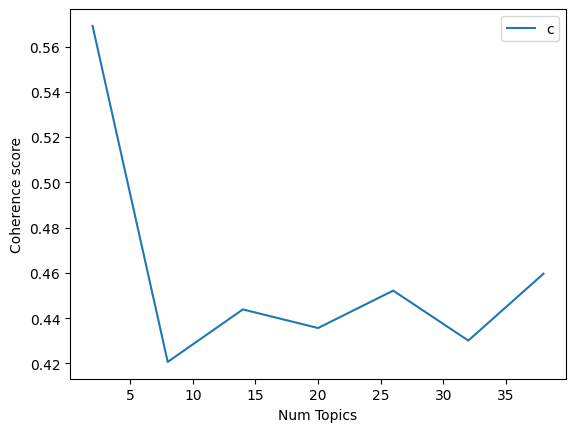

In [25]:

import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

# Running LDA using TF-IDF

In [28]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf,
                                             num_topics=20,
                                              id2word=dictionary,
                                              passes=20,  # <<< cuma 2 pass!
                                              iterations=150,
                                              workers=2,
                                              random_state=42)
print(lda_model_tfidf)

LdaMulticore<num_terms=887, num_topics=20, decay=0.5, chunksize=2000>


In [29]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.040*"genang" + 0.030*"bpbd" + 0.027*"hujan" + 0.025*"ciledug" + 0.019*"jaksel" + 0.015*"mogok" + 0.013*"jual" + 0.013*"motor" + 0.012*"luap" + 0.012*"rendam"


Topic: 1 Word: 0.016*"kumpul" + 0.012*"kian" + 0.011*"motegi" + 0.010*"kemensos" + 0.010*"yusuf" + 0.010*"sembako" + 0.009*"martin" + 0.009*"jorge" + 0.008*"miliar" + 0.008*"angka"


Topic: 2 Word: 0.013*"kemensos" + 0.012*"anggar" + 0.012*"filipina" + 0.011*"pulang" + 0.010*"kendara" + 0.010*"kembali" + 0.009*"desa" + 0.009*"lewat" + 0.009*"budi" + 0.009*"korupsi"


Topic: 3 Word: 0.018*"crash" + 0.018*"klasemen" + 0.013*"balas" + 0.012*"sempurna" + 0.012*"fabio" + 0.012*"bagnaia" + 0.011*"depan" + 0.011*"finis" + 0.011*"podium" + 0.010*"bulutangkis"


Topic: 4 Word: 0.024*"momen" + 0.021*"tennis" + 0.018*"meter" + 0.016*"championship" + 0.015*"tanggal" + 0.013*"foto" + 0.012*"seri" + 0.011*"jawa" + 0.010*"world" + 0.008*"cakup"


Topic: 5 Word: 0.024*"dokumen" + 0.024*"atur" + 0.015*"syarat" + 0.013*"calon" + 

In [30]:

from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.47476051450528445


# classifying sample document using LDA Bag of Words model

In [32]:
#original Text of sample document 4310
document_num = 1 # Define document_num with a sample index
processed_docs[document_num]

['jakarta',
 'menteri',
 'sosial',
 'saifullah',
 'yusuf',
 'ipul',
 'ajak',
 'kepala',
 'daerah',
 'kolaborasi',
 'sukses',
 'program',
 'prioritas',
 'presiden',
 'prabowo',
 'program',
 'mutakhir',
 'data',
 'tunggal',
 'sosial',
 'ekonomi',
 'nasional',
 'dtsen',
 'kembang',
 'sekolah',
 'rakyat',
 'salur',
 'bantu',
 'sosial',
 'bansos',
 'mandat',
 'prioritas',
 'presiden',
 'prabowo',
 'menteri',
 'sosial',
 'kemensos',
 'tindaklanjuti',
 'ipul',
 'terang',
 'tulis',
 'selasa',
 'dtsen',
 'data',
 'tunggal',
 'indonesia',
 'kelola',
 'peringkat',
 'duduk',
 'dasar',
 'desil',
 'mutakhir',
 'kala',
 'turut',
 'program',
 'lintas',
 'menteri',
 'lembaga',
 'perintah',
 'daerah',
 'wajib',
 'acu',
 'dtsen',
 'scroll',
 'continue',
 'with',
 'content',
 'mumpung',
 'kepala',
 'daerah',
 'kepala',
 'dinas',
 'sosial',
 'intervensi',
 'bansos',
 'data',
 'kecuali',
 'dtsen',
 'program',
 'dtsen',
 'sambung',
 'tekan',
 'verifikasi',
 'validasi',
 'data',
 'dtsen',
 'baru',
 'advertise

In [33]:
for index, score in sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))


Score: 0.9923384189605713	 Topic: 0.037*"tiwi" + 0.035*"lanny" + 0.030*"masters" + 0.028*"australia" + 0.021*"bahasa"


In [34]:
lda_model[bow_corpus[document_num]]

[(13, 0.99233836)]

In [35]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(13, 0.99233836)]

In [36]:

lda_model.print_topic(index, 10)

'0.037*"tiwi" + 0.035*"lanny" + 0.030*"masters" + 0.028*"australia" + 0.021*"bahasa" + 0.017*"sesi" + 0.016*"dampak" + 0.015*"sekolah" + 0.012*"jenjang" + 0.012*"mata"'

# classifying sample document using LDA TF-IDF model##

In [37]:
for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True):
    print("\nScore: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))


Score: 0.5179212093353271	 Topic: 0.014*"undang" + 0.012*"didik" + 0.011*"agus" + 0.010*"politik" + 0.010*"daerah"

Score: 0.18846996128559113	 Topic: 0.018*"menpora" + 0.015*"prabowo" + 0.012*"olimpiade" + 0.011*"polda" + 0.011*"prestasi"

Score: 0.10467318445444107	 Topic: 0.089*"found" + 0.020*"israel" + 0.016*"kompetisi" + 0.011*"world" + 0.011*"level"

Score: 0.05525733157992363	 Topic: 0.013*"kemensos" + 0.012*"anggar" + 0.012*"filipina" + 0.011*"pulang" + 0.010*"kendara"

Score: 0.05323069915175438	 Topic: 0.020*"bogor" + 0.017*"lari" + 0.017*"fadia" + 0.014*"kategori" + 0.012*"pria"

Score: 0.03401999548077583	 Topic: 0.018*"crash" + 0.018*"klasemen" + 0.013*"balas" + 0.012*"sempurna" + 0.012*"fabio"

Score: 0.02153080701828003	 Topic: 0.026*"bank" + 0.024*"kacab" + 0.022*"bunuh" + 0.021*"culi" + 0.019*"sangka"

Score: 0.010651087388396263	 Topic: 0.044*"akun" + 0.018*"media" + 0.015*"ukur" + 0.013*"siswa" + 0.011*"kualitas"


In [38]:
unseen_document = "My name is Patrick."

bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: tup[1], reverse=True):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.05000000074505806	 Topic: 0.109*"akun" + 0.047*"media" + 0.037*"golkar" + 0.034*"ketua" + 0.028*"digital"
Score: 0.05000000074505806	 Topic: 0.126*"israel" + 0.052*"gaza" + 0.024*"militer" + 0.023*"serang" + 0.021*"palestina"
Score: 0.05000000074505806	 Topic: 0.072*"polda" + 0.041*"masters" + 0.035*"irjen" + 0.029*"agus" + 0.029*"pohon"
Score: 0.05000000074505806	 Topic: 0.035*"bulutangkis" + 0.028*"juang" + 0.023*"bayar" + 0.023*"tuntas" + 0.023*"pace"
Score: 0.05000000074505806	 Topic: 0.034*"fabio" + 0.033*"aprilia" + 0.030*"bagnaia" + 0.026*"crash" + 0.026*"honda"
Score: 0.05000000074505806	 Topic: 0.016*"tanggal" + 0.015*"lari" + 0.015*"anak" + 0.014*"kembang" + 0.013*"usia"
Score: 0.05000000074505806	 Topic: 0.023*"politik" + 0.023*"pangan" + 0.022*"bangun" + 0.018*"bijak" + 0.017*"daerah"
Score: 0.05000000074505806	 Topic: 0.071*"menpora" + 0.038*"prabowo" + 0.025*"lindung" + 0.024*"negeri" + 0.024*"jabat"
Score: 0.05000000074505806	 Topic: 0.049*"undang" + 0.035*"seko